<a href="https://colab.research.google.com/github/matiascano1/Mi-proyectoDS/blob/main/ProyectoDS_IIParte1_Cano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción de diabetes en India
Autor: Matías Cano

## Definición del problema

El dataset elegido está diseñado para ayudar a predecir y analizar la prevalencia de la diabetes y los factores de riesgo entre la población de la India. Incorpora una amplia gama de atributos demográficos, de estilo de vida y clínicos para garantizar una representación holística de los posibles determinantes de la diabetes. Las características del dataset incluyen:

Datos demográficos:

Edad (int) , sexo (Male, Female, other), residencia (Urban, Rural) y cantidad de embarazos (int).

Factores del estilo de vida:

Actividad física (High, Medium, Low), tipo de dieta (Vegetarian, Non-Vegetarian, Vegan), tabaquismo (Never, Current, Former), consumo de alcohol (High, Moderate) y niveles de estrés (High, Medium, Low).

Historial Médico:

Antecedentes familiares de diabetes (Yes, No), hipertensión (Yes, No), afecciones de la tiroides (Yes, No)  y chequeos periódicos (Yes, No).

Métricas clínicas:

IMC (float), niveles de colesterol (float), azúcar en sangre en ayunas (float) y postprandial (float), hemoglobina glicosilada (HBA1C)(float), niveles de vitamina D (float), niveles de proteína C (float), relación cintura-cadera (float), test de glucosa (float), ritmo cardíaco (int),seguro médico (Yes, No),medicación por condición crónica (Yes, No) y síndrome de ovario poliquístico (Yes, No).

**Variable objetivo**: Estado de diabetes (Diabetes_Status), si está presente o no (Yes, No).

**Preguntas de interés:**

###1. ¿Cuáles son los principales factores de riesgo asociados con la diabetes en la población india?

*Hipótesis:* Existe una asociación significativa entre los factores de estilo de vida (dieta, actividad física, tabaquismo, consumo de alcohol, estrés) y la prevalencia de diabetes en la población india.


###2. ¿Existe alguna diferencia en la prevalencia de diabetes entre diferentes grupos demográficos?

Hipótesis: Los factores demográficos (edad, sexo, residencia) influyen en la prevalencia de diabetes en la población india.

###3. ¿Cómo influyen los factores de estilo de vida en el riesgo de diabetes?

Hipótesis: La falta de actividad física regular se asocia con un mayor riesgo de diabetes en la población india.


###4. ¿Cuál es el papel de los antecedentes médicos y familiares en la predicción de la diabetes?

Hipótesis: Los antecedentes médicos (familiares con diabetes, hipertensión, afecciones de la tiroides) aumentan el riesgo de desarrollar diabetes en la población india.

Hipótesis: Las personas con antecedentes familiares de diabetes tienen una mayor probabilidad de desarrollar la enfermedad en comparación con aquellas sin antecedentes familiares.



El **objetivo general** es utilizar los datos para predecir quien puede tener diabetes o no.

# **Lectura de Datos**

---



**Librerias, configuracion del entorno y lectura del dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # Filtro los warnings que puede generarme el código
warnings.filterwarnings('ignore')
url= 'https://raw.githubusercontent.com/matiascano1/Mi-proyectoDS/refs/heads/main/diabetes_prediction_india.csv'
df=pd.read_csv(url,sep=',')
df.head(10)

,Age,Gender,BMI,Family_History,Physical_Activity,Diet_Type,Smoking_Status,Alcohol_Intake,Stress_Level,Hypertension,...,Health_Insurance,Regular_Checkups,Medication_For_Chronic_Conditions,Pregnancies,Polycystic_Ovary_Syndrome,Glucose_Tolerance_Test_Result,Vitamin_D_Level,C_Protein_Level,Thyroid_Condition,Diabetes_Status
0,48,Male,35.5,No,High,Non-Vegetarian,Never,NaN,Medium,Yes,...,No,No,No,0,0,124.3,31.5,7.46,Yes,Yes
1,18,Other,28.7,Yes,Medium,Non-Vegetarian,Current,Moderate,High,No,...,Yes,Yes,No,0,0,151.4,12.5,5.64,Yes,No
2,21,Other,30.0,Yes,High,Non-Vegetarian,Current,Moderate,High,Yes,...,No,No,Yes,0,0,106.1,35.8,7.20,No,Yes
3,25,Female,25.6,No,Medium,Vegetarian,Former,Moderate,High,Yes,...,No,No,Yes,1,No,85.6,15.4,6.53,Yes,No
4,78,Male,38.8,No,High,Non-Vegetarian,Current,High,High,No,...,No,No,Yes,0,0,77.0,28.6,0.58,No,Yes
5,60,Male,19.2,No,High,Vegetarian,Current,NaN,Low,No,...,No,Yes,Yes,0,0,180.2,49.0,1.83,No,No
6,38,Female,36.4,Yes,Medium,Vegetarian,Current,High,Medium,No,...,Yes,No,Yes,2,No,78.6,11.7,8.24,Yes,No
7,23,Other,21.4,No,Medium,Vegan,Never,NaN,Low,No,...,Yes,Yes,Yes,0,0,140.6,25.8,3.39,Yes,No
8,22,Female,18.9,No,Medium,Vegan,Former,NaN,Medium,Yes,...,Yes,Yes,Yes,0,No,87.5,18.4,3.86,No,No
9,18,Female,24.4,No,Low,Vegetarian,Never,NaN,Medium,Yes,...,Yes,Yes,No,9,Yes,157.2,23.6,2.16,Yes,Yes


**Análisis inicial**

In [2]:
#hago una copia del df original y trabajo sobre la misma.
df_copy = df.copy()

In [3]:
# Veo las dimensiones del dataset
df_copy.shape

(5292, 27)

In [4]:
#Busco información general del dataset
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5292 entries, 0 to 5291
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                5292 non-null   int64  
 1   Gender                             5292 non-null   object 
 2   BMI                                5292 non-null   float64
 3   Family_History                     5292 non-null   object 
 4   Physical_Activity                  5292 non-null   object 
 5   Diet_Type                          5292 non-null   object 
 6   Smoking_Status                     5292 non-null   object 
 7   Alcohol_Intake                     3512 non-null   object 
 8   Stress_Level                       5292 non-null   object 
 9   Hypertension                       5292 non-null   object 
 10  Cholesterol_Level                  5292 non-null   float64
 11  Fasting_Blood_Sugar                5292 non-null   float

In [5]:
# Hay 27 columnas, así que quiero saber sus nombres
df_copy.columns


Index(['Age', 'Gender', 'BMI', 'Family_History', 'Physical_Activity',
       'Diet_Type', 'Smoking_Status', 'Alcohol_Intake', 'Stress_Level',
       'Hypertension', 'Cholesterol_Level', 'Fasting_Blood_Sugar',
       'Postprandial_Blood_Sugar', 'HBA1C', 'Heart_Rate', 'Waist_Hip_Ratio',
       'Urban_Rural', 'Health_Insurance', 'Regular_Checkups',
       'Medication_For_Chronic_Conditions', 'Pregnancies',
       'Polycystic_Ovary_Syndrome', 'Glucose_Tolerance_Test_Result',
       'Vitamin_D_Level', 'C_Protein_Level', 'Thyroid_Condition',
       'Diabetes_Status'],
      dtype='object')

Diccionario de variables:

**Age**: Edad de los pacientes analizados.

**Gender**: Género.

**BMI**: Indice de masa corporal.

**Family_History**: Si algún familiar tuvo diabetes o no.

**Physical_Activity**: Si el paciente raliza actividad física.

**Diet_Tipe**: Alimentos que consume.

**Smoking_Status**: Si es fumador o no.

**Alcohol_Intake**: Si consume alcohol o no.

**Stress_Level**: Nivel de estrés.

**Hypertension**: Hipertensión, es la presión arterial alta.

**Cholesterol_Level**: Nivel de colesterol.

**Fasting_Blood_Sugar**: Azúcar en sangre en ayunas.

**Postprandial_Blood_Sugar**: Azúcar en sangre postprandial (luego de una comida).

**HBA1C**: Hemoglobina Glicosilada, prueba muy importante.

**Heart_Rate**: Frecuencia cardíaca.

**Waist_Hip_Ratio**: Relación cadera-cintura.

**Urban_Rural**: Zona de residencia.

**Health_Insurance**: Seguro médico.

**Regular_Checkups**: Chequeos regulares.

**Medication_For_Chronic_Conditions**: Medicación para pacientes crónicos.

**Pregnancies**: Embarazos (cantidad).

**Polycystic_Ovary_Syndrome**: Síndrome de ovario poliquístico.

**Glucose_Tolerance_Test_Result**: Resultados del test de tolerancia a la gulcosa.

**Vitamin_D_Level**: Nivel de vitamina D.

**C_Protein_Level**: Nivel de proteína C.

**Thyroid_Condition**: Afeccion de la tiroides.

**Diabetes_Status**: Si tiene diabetes o no

      

In [6]:
# Quiero ver los tipos de datos que tienen las columnas del dataset
tipos_de_datos = df_copy.dtypes
print(tipos_de_datos)

Age                                    int64
Gender                                object
BMI                                  float64
Family_History                        object
Physical_Activity                     object
Diet_Type                             object
Smoking_Status                        object
Alcohol_Intake                        object
Stress_Level                          object
Hypertension                          object
Cholesterol_Level                    float64
Fasting_Blood_Sugar                  float64
Postprandial_Blood_Sugar             float64
HBA1C                                float64
Heart_Rate                             int64
Waist_Hip_Ratio                      float64
Urban_Rural                           object
Health_Insurance                      object
Regular_Checkups                      object
Medication_For_Chronic_Conditions     object
Pregnancies                            int64
Polycystic_Ovary_Syndrome             object
Glucose_To

# **Limpieza y transformación de datos.**

**Valores nulos, faltantes o duplicados**: Analizo el dataframe, para verificar si existen valores nulos, y encuentro que en la ingesta de alcohol tengo 1780 valores nulos.

In [7]:
# Analizo si existen valores nulos
valores_faltantes = df_copy.isnull().sum()
print(valores_faltantes)

Age                                     0
Gender                                  0
BMI                                     0
Family_History                          0
Physical_Activity                       0
Diet_Type                               0
Smoking_Status                          0
Alcohol_Intake                       1780
Stress_Level                            0
Hypertension                            0
Cholesterol_Level                       0
Fasting_Blood_Sugar                     0
Postprandial_Blood_Sugar                0
HBA1C                                   0
Heart_Rate                              0
Waist_Hip_Ratio                         0
Urban_Rural                             0
Health_Insurance                        0
Regular_Checkups                        0
Medication_For_Chronic_Conditions       0
Pregnancies                             0
Polycystic_Ovary_Syndrome               0
Glucose_Tolerance_Test_Result           0
Vitamin_D_Level                   

In [8]:
# Veo los valores que contiene la columna en la cual tengo valores Not a Number
valores_unicos = df_copy['Alcohol_Intake'].unique()
print(valores_unicos)

[nan 'Moderate' 'High']


Supongo que los NaN representan la ausencia de consumo de alcohol, y los reemplazo con "never". Ésta decisión me ayudará a minimizar el sesgo en el análisis. Si se imputaran los NaN con la moda o una categoría aleatoria, se podría introducir un sesgo artificial en la distribución de la variable.

In [9]:
df_copy['Alcohol_Intake'] = df_copy['Alcohol_Intake'].fillna('Never')
valores_unicos = df_copy['Alcohol_Intake'].unique()
print(valores_unicos)


['Never' 'Moderate' 'High']


Analizo la columna Gender

In [10]:
valor_gender = df_copy['Gender'].unique()
print(valor_gender)

['Male' 'Other' 'Female']


Puedo ver que en la columna Gender, tengo el valor Other, entonces decido usar la columna Pregnancies como referencia, por lo que si Pregnancies es true y Gender es other, lo reemplazo por female. Esta decisión me permite mantener el tamaño total de la muestra, lo que aumenta la potencia estadística del análisis y reduce el riesgo de obtener resultados no representativos.

In [11]:
# Función para asignar el nuevo valor de Gender basado en las condiciones
def asignar_genero(row):
    if row['Gender'] == 'Other':
        if row['Pregnancies'] > 0:
            return 'Female'
        else:
            return 'Male'
    else:
        return row['Gender']

# Aplico la función a cada fila del DataFrame para actualizar la columna 'Gender'
df_copy['Gender'] = df_copy.apply(asignar_genero, axis=1)

# Veo si se realizó el cambio
valor_gender = df_copy['Gender'].unique()
print(valor_gender)

['Male' 'Female']


Ahora quiero eliminar las columnas que no contribuyen al estudio de si alguien tiene o no diabetes. En este caso son, chequeos regulares y el seguro médico.

También puedo eliminar Heart_Rate, ya que el rango de análisis del dataset me da entre 60 y 119 lpm, y la frecuencia elevada alta (mayor a 120 lpm) me dice que está ligada a la presencia de diabetes. Por lo cual no necesito esa columna, ya que el máximo valor es 119 lpm.

Elimino la columna Waist_Hip_Ratio, ya que me da informacion redundante, poorque estoy analizando la columna BMI para relacionar peso con presencia de diabetes.

Existe una confusión entre nivel de proteína C y Péptido C, aquí el nivel de proteina C no nos proporciona información sobre diabetes, por lo cual no voy a tener en cuenta esta columna

In [12]:
df_copy.drop(['Health_Insurance','Regular_Checkups','Heart_Rate','Waist_Hip_Ratio','C_Protein_Level'], axis=1, inplace=True)
df_copy.columns

Index(['Age', 'Gender', 'BMI', 'Family_History', 'Physical_Activity',
       'Diet_Type', 'Smoking_Status', 'Alcohol_Intake', 'Stress_Level',
       'Hypertension', 'Cholesterol_Level', 'Fasting_Blood_Sugar',
       'Postprandial_Blood_Sugar', 'HBA1C', 'Urban_Rural',
       'Medication_For_Chronic_Conditions', 'Pregnancies',
       'Polycystic_Ovary_Syndrome', 'Glucose_Tolerance_Test_Result',
       'Vitamin_D_Level', 'Thyroid_Condition', 'Diabetes_Status'],
      dtype='object')

In [13]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5292 entries, 0 to 5291
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                5292 non-null   int64  
 1   Gender                             5292 non-null   object 
 2   BMI                                5292 non-null   float64
 3   Family_History                     5292 non-null   object 
 4   Physical_Activity                  5292 non-null   object 
 5   Diet_Type                          5292 non-null   object 
 6   Smoking_Status                     5292 non-null   object 
 7   Alcohol_Intake                     5292 non-null   object 
 8   Stress_Level                       5292 non-null   object 
 9   Hypertension                       5292 non-null   object 
 10  Cholesterol_Level                  5292 non-null   float64
 11  Fasting_Blood_Sugar                5292 non-null   float

**Tratamiento de outliers**: Analizo las columnas numéricas para ver si encuentro outliers.

In [14]:
# Columnas numéricas para anlizar
columnas_numericas1 = [
   'Age','Cholesterol_Level',
   'Fasting_Blood_Sugar', 'Postprandial_Blood_Sugar',
 'Glucose_Tolerance_Test_Result'
]

In [15]:
columnas_numericas2 = [
   'BMI','HBA1C',
   'Vitamin_D_Level'
]

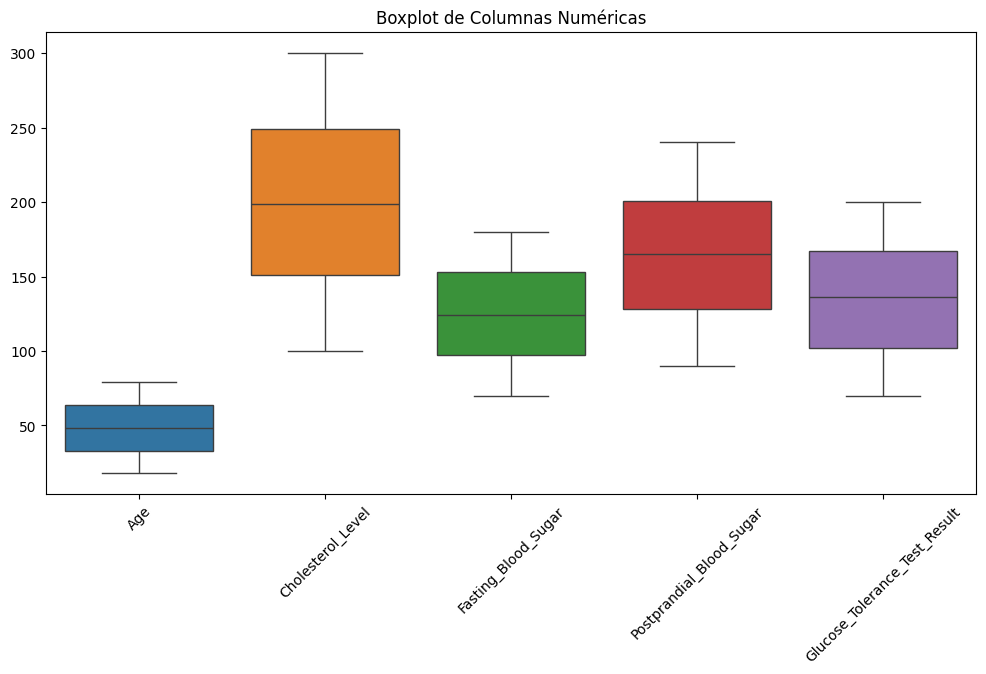

In [16]:
# Visualización de outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_copy[columnas_numericas1])
plt.title("Boxplot de Columnas Numéricas")
plt.xticks(rotation=45)
plt.show()

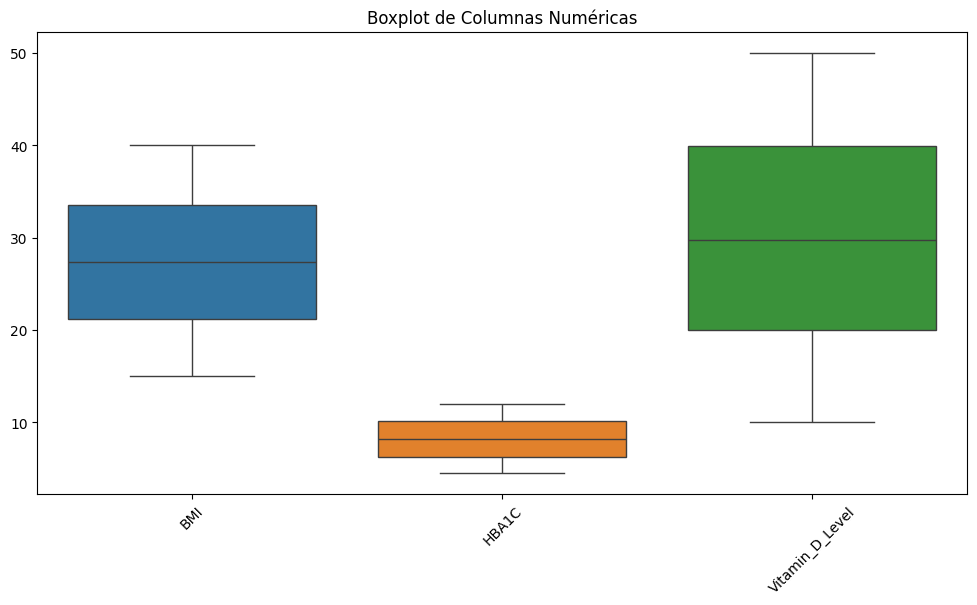

In [17]:
# Visualización de outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_copy[columnas_numericas2])
plt.title("Boxplot de Columnas Numéricas")
plt.xticks(rotation=45)
plt.show()

In [18]:
#Realizo una estadística descriptiva para tener una idea sobre las variables numéricas.
print ("Estadísticas descriptivas para variables numéricas: ")
print(df_copy.describe()) # Para ver media, desvío estándar, mínimos y máximos

Estadísticas descriptivas para variables numéricas: 
               Age          BMI  Cholesterol_Level  Fasting_Blood_Sugar  \
count  5292.000000  5292.000000        5292.000000          5292.000000   
mean     48.417989    27.459883         199.777098           124.940193   
std      18.040544     7.194187          57.103759            32.091770   
min      18.000000    15.000000         100.000000            70.000000   
25%      33.000000    21.200000         151.100000            97.100000   
50%      48.000000    27.400000         198.600000           124.050000   
75%      64.000000    33.600000         249.100000           153.300000   
max      79.000000    40.000000         300.000000           180.000000   

       Postprandial_Blood_Sugar        HBA1C  Pregnancies  \
count               5292.000000  5292.000000  5292.000000   
mean                 164.709902     8.226909     1.493386   
std                   43.152803     2.179662     2.677414   
min                   90.10

Puedo concluir en base a los gráficos de cajas, que no tengo outliers en las variables analizadas y los rangos son correctos.

El BMI se encuentra en rango normal (menos de 18 es "muy bajo peso" a más de 30 que sería obesidad) de análisis, o sea que no hay valores atípicos.

La Hemoglobina Glicosilada (HBA1C) tiene un rango (menos a 5.7 es normal, y mas de 6.5 presenta diabetes).

Nivel de colesterol, rango (menos de 200 es normal a mas de 240 que es alto)

Fasting_Blood_Sugar, rango (menos a 100 normal, a mas de 126 ya se considera diabetes).

Postprandial_Blood_Sugar, rango (menos a 140 es normal, a mas de 200 que se considera diabetes)

Glucose_Tolerance_Test_Result, rango (menos a 100 es normal, mas de 200 se considera diabetes)

Vitamin_D_Level, rango (menos de 20 se considera insuficiente, entre 30 y 50 se consider normal)


#**Análisis exploratorio de datos**

Realizo un análisis con gáficos de barras comparando antecedentes familiares, si son fumadores, si ingieren alcohol y si son hipertensos.

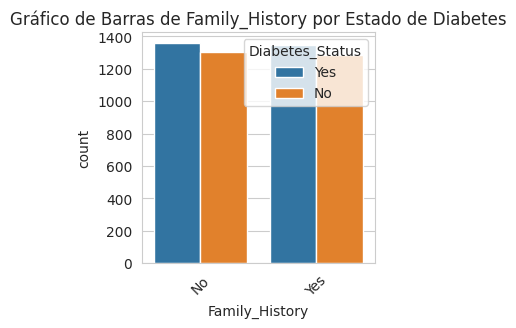

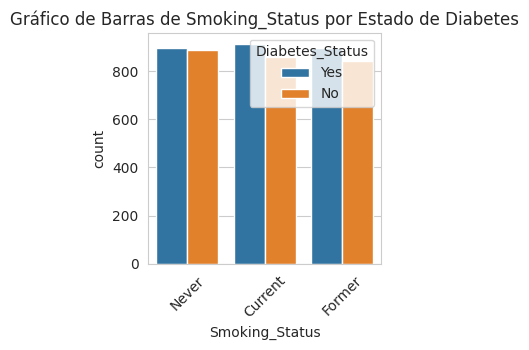

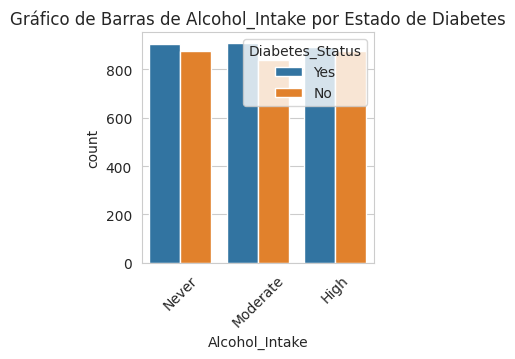

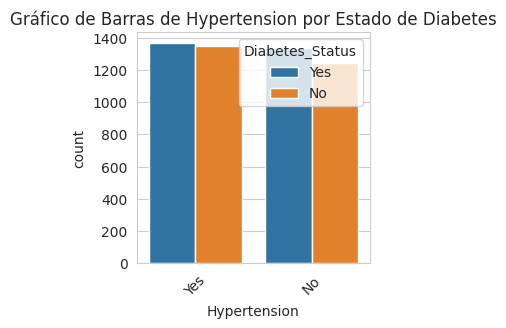

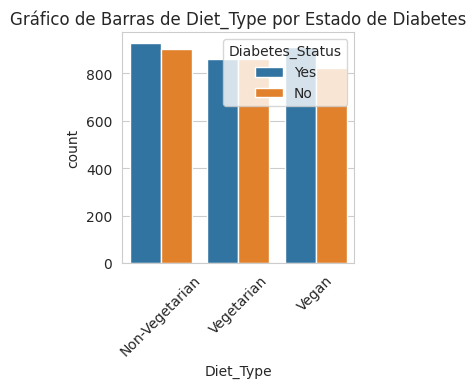

In [21]:
# Columnas categóricas relevantes
categorical_cols = ['Family_History', 'Smoking_Status', 'Alcohol_Intake','Hypertension','Diet_Type']

# Crear gráficos de barras para cada columna categórica
for col in categorical_cols:
    plt.figure(figsize=(3, 3))
    sns.countplot(data=df_copy, x=col, hue='Diabetes_Status')
    plt.title(f'Gráfico de Barras de {col} por Estado de Diabetes')
    plt.xticks(rotation=45)
    plt.show()

Los que son fumadores, toman alcohol, son hipertensos y no son vegetarianos tienen mas posibilidades de tener diabetes.